### Ideias
- Adicionar probabilidade de alta variação, além dos limites tradicionais
- Integração entre variáveis claramente correlacionadas
- H2 e Metano inversamente proporcionais de modo que a soma de seus valores apresente uma variação de 75-105% (tipicamente 93-98%) do total

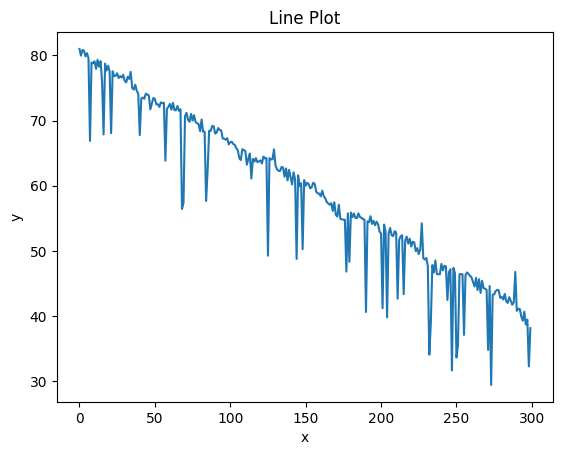

In [53]:
import matplotlib.pyplot as plt
from math import sin, cos, pi, sqrt
import random

x0 = 0
x1 = 300
y0 = 80
y1 = 40

def plot_line(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    x_values = []
    y_values = []
    if dx == 0:
        for y in range(y0, y1):
            x_values.append(x0)
            y_values.append(y)
    else:
        for x in range(x0, x1):
            y = y0 + dy * (x - x0) / dx
            if random.random() < 0.1:
                y += random.randint(-15, 5)
            if random.random() < 0.5:
                y += sin(x/10)
            if random.random() < 0.5:
                y += cos(x/5)
            # if random.random() < 0.04:
            #     y += sqrt(x)
            x_values.append(x)
            y_values.append(y)
    plt.plot(x_values, y_values)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Line Plot')
    plt.show()

plot_line(x0, y0, x1, y1)

Node H2: Metano 
Node Metano: 


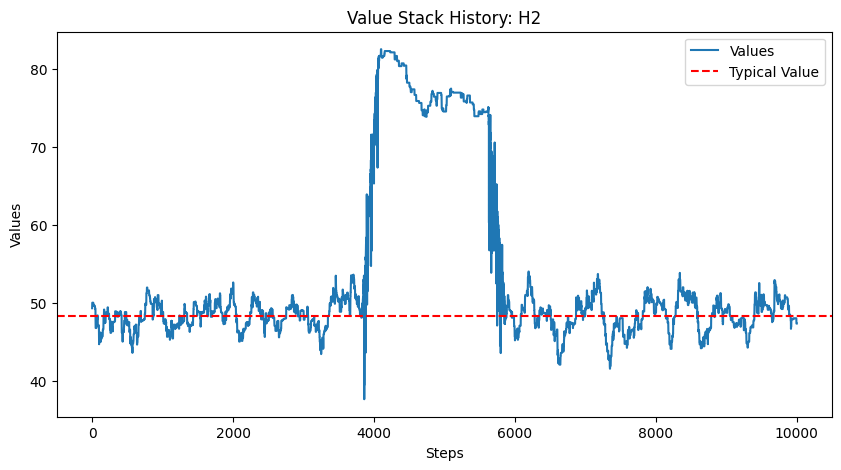

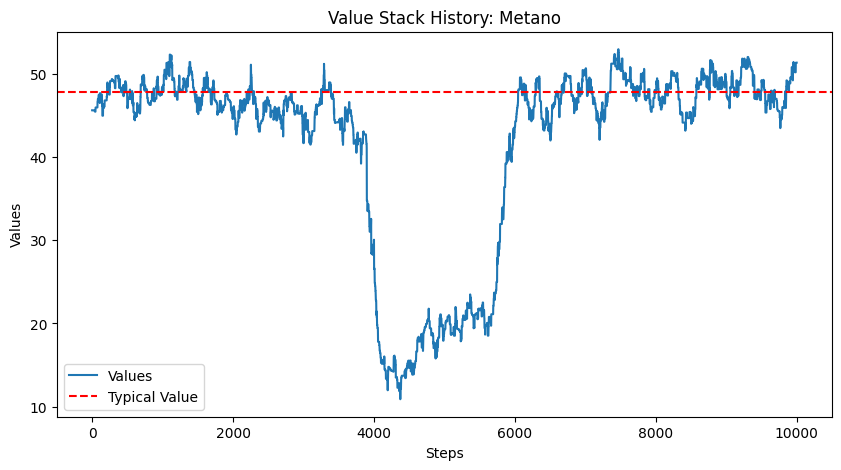

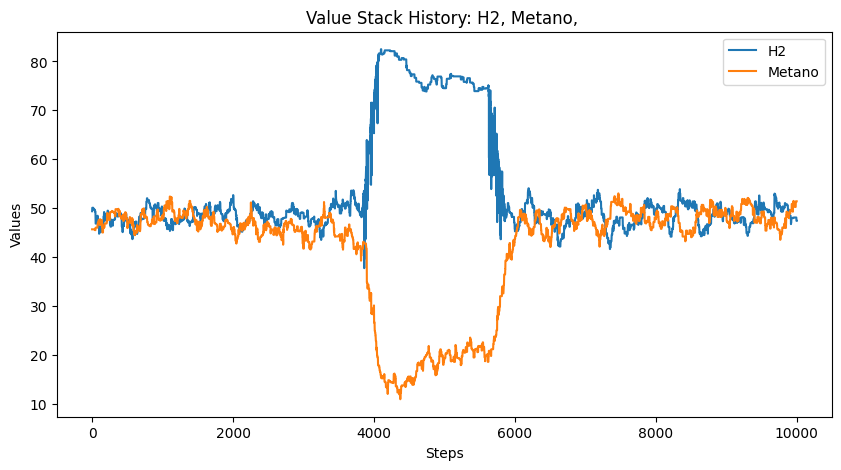

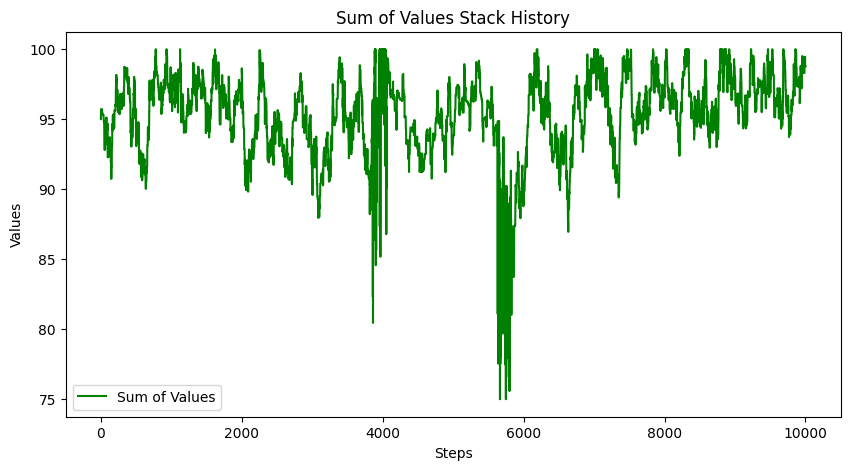

In [1]:
from TurbineSimulator import Standard, Graph, CorrelacaoH2Metano, CorrelacaoUsual
from TurbineSimulator import show_history, show_sum_history

H2      = Standard(lower_bound=30, upper_bound=60, typical_value=48.32, 
                   name="H2", theta=1.5, typical_bias=0.1,
                   exceed_prob=0.0001, 
                   exceed_duration_range=(240,300),
                   return_duration_range=(240,300), 
                   exceed_peak_value_range=(70,85),
                   hold_duration_range=(1440,1800),
                   hold_variation=1)
Metano  = Standard(lower_bound=39.24, upper_bound=70, typical_value=47.86, 
                   name="Metano", theta=1.5, typical_bias=0.1)
# Propano = Standard(lower_bound=0, upper_bound=0.8, typical_value=0.7,
#                     name="Propano", theta=0.01, typical_bias=0.1)
# Enxofre = Standard(lower_bound=0, upper_bound=8, typical_value=0,
#                     name="Enxofre", theta=0.01, typical_bias=0.9)

relation1 = CorrelacaoH2Metano(limit_lower_bound=75, limit_upper_bound=100,
                              typical_lower_bound=93, typical_upper_bound=98)
# relation2 = CorrelacaoUsual(correlation=0.94)
# relation3 = CorrelacaoUsual(correlation=0)

graph = Graph()
node1 = graph.add_node(H2)
node2 = graph.add_node(Metano)
# node3 = graph.add_node(Propano)
# node4 = graph.add_node(Enxofre)
graph.add_edge(root=node1, child=node2, strategy=relation1)
# graph.add_edge(root=node2, child=node3, strategy=relation2)
# graph.add_edge(root=node2, child=node4, strategy=relation3)

graph.display()
graph.simulate(10000)
node1.op.show_history()
node2.op.show_history()
# node3.op.show_history()
# node4.op.show_history()

show_history(nodes=[node1, node2])
show_sum_history(node1, node2)